In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from statsmodels.tsa.arima.model import ARIMA
from collections import Counter
from textblob import TextBlob

In [2]:
# Step 1: Load the preprocessed data
data = pd.read_csv('combined_preprocessed_data.csv')

# Ensure 'tweet_created_at' is in datetime format
data['tweet_created_at'] = pd.to_datetime(data['tweet_created_at'])


Daily Activity Summary:
count    1328.000000
mean        4.005271
std         9.105468
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       246.000000
dtype: float64


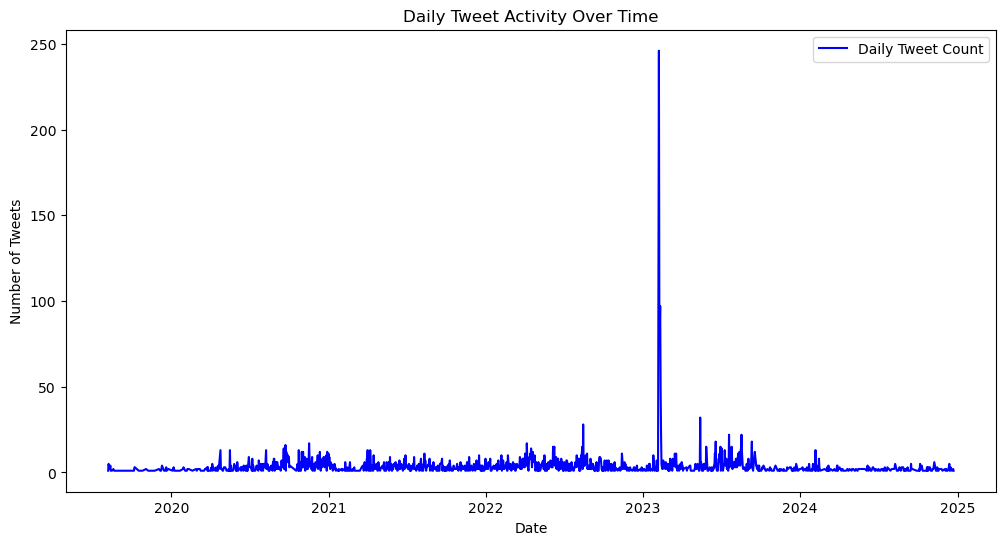

In [3]:
# Step 2: Daily and Hourly Activity Analysis
# Daily activity
daily_activity = data.groupby(data['tweet_created_at'].dt.date).size()
print("Daily Activity Summary:")
print(daily_activity.describe())

# Plot daily activity
plt.figure(figsize=(12, 6))
plt.plot(daily_activity.index, daily_activity, label='Daily Tweet Count', color='blue')
plt.title('Daily Tweet Activity Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.legend()
plt.show()


Hourly Activity Summary:
tweet_created_at
0      25
1      11
2      12
3      43
4     117
5     171
6     224
7     252
8     214
9     292
10    278
11    312
12    299
13    228
14    249
15    275
16    296
17    284
18    277
19    413
20    461
21    348
22    177
23     61
dtype: int64


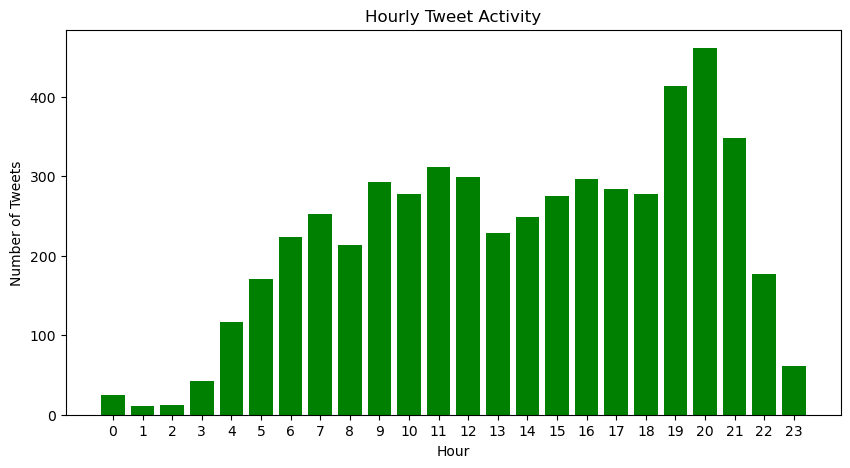

In [4]:
# Hourly activity
hourly_activity = data.groupby(data['tweet_created_at'].dt.hour).size()
print("\nHourly Activity Summary:")
print(hourly_activity)

# Plot hourly activity
plt.figure(figsize=(10, 5))
plt.bar(hourly_activity.index, hourly_activity, color='green')
plt.title('Hourly Tweet Activity')
plt.xlabel('Hour')
plt.ylabel('Number of Tweets')
plt.xticks(range(0, 24))  # Show each hour
plt.show()

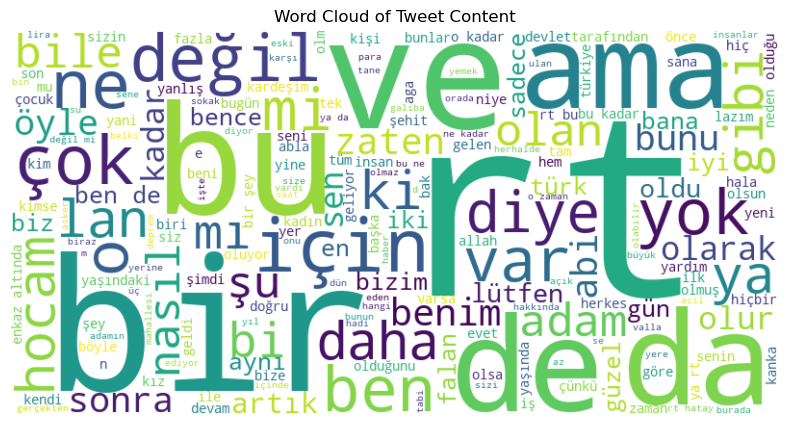

In [8]:
# Step 3: Word Cloud for Tweet Content
all_text = ' '.join(data['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweet Content')
plt.show()

In [9]:
# Step 4: Sentiment Analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

data['sentiment'] = data['clean_text'].apply(get_sentiment)

# Sentiment distribution
print("\nSentiment Distribution:")
print(data['sentiment'].value_counts())


Sentiment Distribution:
sentiment
neutral     5218
positive      71
negative      30
Name: count, dtype: int64


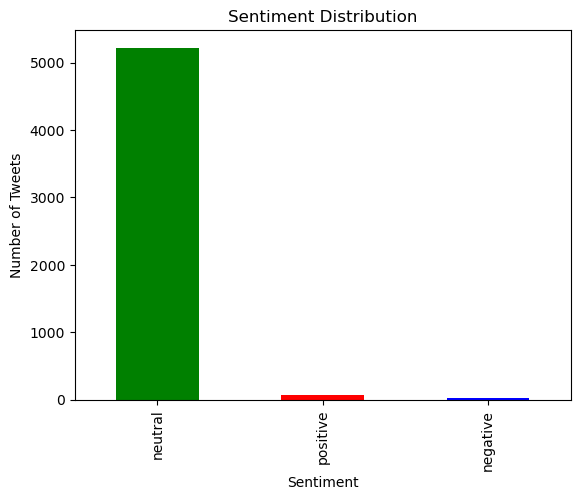

In [10]:
# Plot sentiment distribution
data['sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution', color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()


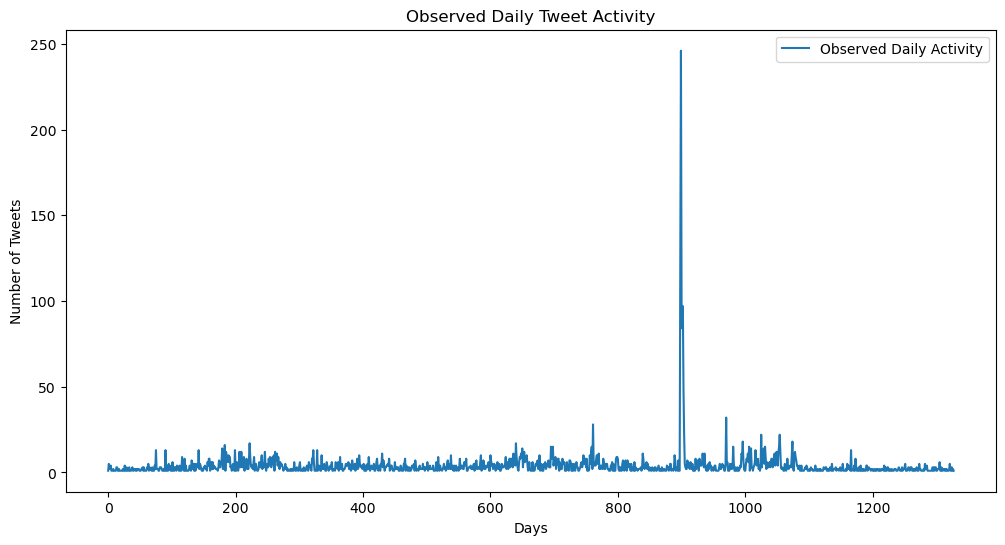

In [11]:
# Step 6: Daily Activity Forecast with ARIMA
# Convert daily activity to a series
daily_activity_series = daily_activity.reset_index(drop=True)

# Plot observed data
plt.figure(figsize=(12, 6))
plt.plot(daily_activity_series, label='Observed Daily Activity')
plt.title('Observed Daily Tweet Activity')
plt.xlabel('Days')
plt.ylabel('Number of Tweets')
plt.legend()
plt.show()

### Prediction model

In [17]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the complete time series data
# Convert daily activity into a series
daily_activity_series = daily_activity.reset_index(drop=True)

# Step 2: Build and train the ARIMA model
# ARIMA parameters (p, d, q) can be adjusted based on ACF/PACF analysis
model = ARIMA(daily_activity_series, order=(5, 1, 0))  # (p, d, q) values for ARIMA
model_fit = model.fit()

In [18]:
# Step 3: Generate fitted values and forecast
# Get the fitted values (model's predictions for observed data)
fitted_values = model_fit.fittedvalues  

# Forecast future values (e.g., for the next 7 days)
forecast_steps = 7
forecast = model_fit.forecast(steps=forecast_steps)

# Combine fitted values with forecasted values for a full dataset prediction
full_forecast = np.concatenate([fitted_values, forecast])


In [19]:
# Step 4: Output the results
# Print fitted values for past observations
print("Fitted Values (Past):")
print(fitted_values)

# Print forecasted values for the future
print("\nForecasted Values (Future):")
print(forecast)


Fitted Values (Past):
0       0.000000
1       0.999992
2       4.418270
3       2.178700
4       2.823407
          ...   
1323    0.790736
1324    2.097175
1325    2.427194
1326    0.757639
1327    2.754330
Length: 1328, dtype: float64

Forecasted Values (Future):
1328    0.791586
1329    1.071667
1330    1.228798
1331    1.094750
1332    1.171438
1333    1.193871
1334    1.131933
Name: predicted_mean, dtype: float64


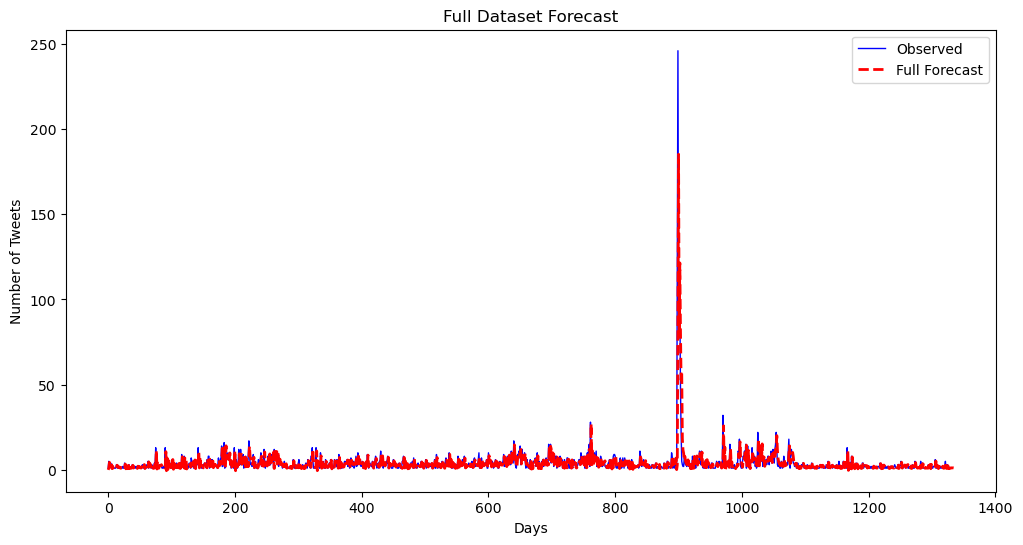

In [20]:
# Step 5: Visualize the results
# Plot observed data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_activity_series.index, daily_activity_series, label='Observed', color='blue', linewidth=1)
plt.plot(
    range(len(full_forecast)), full_forecast, label='Full Forecast', color='red', linewidth=2, linestyle='--'
)
plt.title('Full Dataset Forecast')
plt.xlabel('Days')
plt.ylabel('Number of Tweets')
plt.legend()
plt.show()